<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/2_22_%5BData_Analyze%5D_%EC%9C%A0%ED%8A%9C%EB%B8%8C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
%config InlineBackend.figure_format = 'retina'

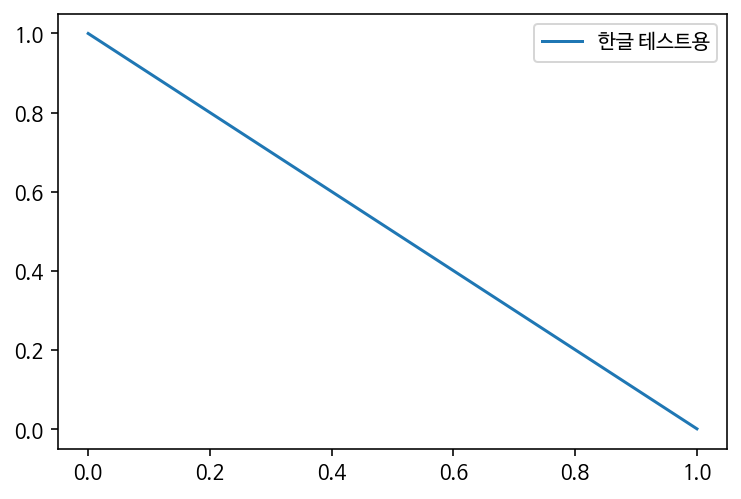

In [3]:
plt.plot([0, 1], [1, 0], label="한글 테스트용")
plt.legend()
plt.show()

# 데이터 불러오기

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
youtube_filepath = "/content/drive/MyDrive/ICTCOG 인공지능과정/Data/KR_youtube_trending_data.csv"
KRvideo = pd.read_csv(youtube_filepath, encoding='utf-8')
KRvideo.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [6]:
KRvideo.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
58349,nkzSn3uvKcA,[국내 3대 미제사건] 이제는 2개의 사건이 남았다 #highlight #알쓸범잡 ...,2021-06-02T06:41:56Z,UC78PMQprrZTbU0IlMDsYZPw,tvN,24,2021-06-12T00:00:00Z,김상욱|박지선|알쓸범잡|알아두면쓸데있는범죄잡학사전|양정우PD|윤종신|장항준|정재민,1587800,7300,293,1584,https://i.ytimg.com/vi/nkzSn3uvKcA/default.jpg,False,False,#알쓸범잡 #알아두면 쓸데있는 범죄 잡학사전 #사건사고알쓸범잡 crimetrivia...
58350,ZzbNM2l-AAA,안녕 Hello,2021-05-31T09:01:25Z,UCTEWSEBfdU8GB7J_XV6VBKw,JOY - Topic,10,2021-06-12T00:00:00Z,JOY|안녕 Hello - Special Album|안녕 Hello,1584317,20515,713,6,https://i.ytimg.com/vi/ZzbNM2l-AAA/default.jpg,False,False,Provided to YouTube by SM Entertainment안녕 Hell...
58351,rhdgx6SfwvU,한국에 시집간 딸을 보러 온 외국 부모님이 문화충격 받은 이유,2021-06-01T10:30:15Z,UCudezj2i6R94QOPqGJhbZwg,에이 스토리 A STORY,24,2021-06-12T00:00:00Z,[None],986530,23004,285,565,https://i.ytimg.com/vi/rhdgx6SfwvU/default.jpg,False,False,외국 부모님이 한국과 사랑에 빠지게 된 이유? 오늘은 불의 나라 아제르바이잔에서 오...
58352,37x__fpGxGE,돼지갈비는 이렇게 먹어야지 제맛! [Charcoal Grilled Spar...,2021-06-02T23:31:48Z,UCuDLnJ_ZTQ9veA1mHnXEAJQ,먹두리,22,2021-06-12T00:00:00Z,돼지갈비|양념갈비|참숯갈비|Charcoal Grilled Spareribs|먹두리,471002,11417,257,1738,https://i.ytimg.com/vi/37x__fpGxGE/default.jpg,False,False,집 나간 입맛 돌아오게 만드는 채널 먹두리에서 여러분께 정말 맛있는 먹방 보여 드립...
58353,dMEgMG6TS3c,퐁키야 제발ㅠㅠ 강아지 배에 이상한게 들어있어요ㅜㅜ,2021-06-02T09:00:13Z,UC3PSZivQbIegrfavj4fmgQQ,[THE SOY]루퐁이네,15,2021-06-12T00:00:00Z,ポメラニアン|博美犬|Pomeranian|강아지유튜버|강아지유튜브|더소이|포메|pom...,847075,18084,301,1550,https://i.ytimg.com/vi/dMEgMG6TS3c/default.jpg,False,False,#말썽쟁이강아지 #루퐁이네 #rudypongki루퐁이 힐링채널 youtube.co...


In [7]:
KRvideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58354 entries, 0 to 58353
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           58354 non-null  object
 1   title              58354 non-null  object
 2   publishedAt        58354 non-null  object
 3   channelId          58354 non-null  object
 4   channelTitle       58354 non-null  object
 5   categoryId         58354 non-null  int64 
 6   trending_date      58354 non-null  object
 7   tags               58354 non-null  object
 8   view_count         58354 non-null  int64 
 9   likes              58354 non-null  int64 
 10  dislikes           58354 non-null  int64 
 11  comment_count      58354 non-null  int64 
 12  thumbnail_link     58354 non-null  object
 13  comments_disabled  58354 non-null  bool  
 14  ratings_disabled   58354 non-null  bool  
 15  description        57358 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

총 데이터는 58354개, description 컬럼에 NaN값이 존재함

**결측값이 각 컬럼별로 몇개 인지 보여주기**

In [8]:
KRvideo.isnull().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          996
dtype: int64

# 데이터 정리하기

## 1. 필요한 컬럼만 추리기

In [9]:
cols = ["title", "channelTitle", "view_count"]
df = KRvideo[cols]
df.head()

,title,channelTitle,view_count
0,안녕하세요 보겸입니다,보겸 BK,5947503
1,부락토스의 계획 [총몇명 프리퀄],총몇명,963384
2,평생 반성하면서 살겠습니다.,양팡 YangPang,2950885
3,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,1743374
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,3433885


## 2. view 내림 차순 정렬

In [10]:
df_sorted = df.sort_values(by="view_count", ascending=False)
df_sorted

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
54938,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,292502967
54729,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,289350312
54519,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,285698612
54284,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,282265069
...,...,...,...
47002,Earth Day 2021 Doodle,GoogleDoodles,0
47909,Earth Day 2021 Doodle,GoogleDoodles,0
25512,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0
47684,Earth Day 2021 Doodle,GoogleDoodles,0


## 3. 중복 제거

In [11]:
df_drop_sorted = df_sorted.drop_duplicates(["title", "channelTitle"], keep='first')
df_drop_sorted

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
2733,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,262319276
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,184778248
18935,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,161912058
9696,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,161416953
...,...,...,...
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),「싸꼰」사사건건,17294
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),「싸꼰」사사건건,16957
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",YTN 라디오,15845
48130,Earth Day 2021 Doodle,GoogleDoodles,0


# 인기 채널 순위 시각화

## 1. 조회수 기준 top 100 채널 순위 조회

#### 채널별 조회수 합계

In [47]:
df_channel_view_sum = df_drop_sorted.groupby(df_drop_sorted['channelTitle']).sum()
df_channel_view_sum

# 피벗 테이블 이용하면??
# pd.pivot_table(df_drop_sorted, index = ['channelTitle'], aggfunc='sum')

,,view_count
title,channelTitle,
"#1. [메시특집] 리오넬 메시, 이적 요청!! 관련 기사 종합",이스타TV,219189
"#1. [슈퍼리그] 챔스 종결? 드디어 창설된 슈퍼리그, 형태와 방식은?",이스타TV,449897
#MtnDew3PT​ Contest Full Highlights | 2021 #NBAAllStar,NBA,6582087
#QnA 이제 헤어졌냐고 그만물어본다‼️#모델이된계기 #다이어트방법 #좋은남자구별방법 등등 #팝콘각 🍿,Todayommmi,168762
"#Team워너 Live : 청하, 크리스토퍼 (CHUNG HA, Christopher) - Bad Boy",워너뮤직코리아 (Warner Music Korea),982019
...,...,...
🧐마피아게임 하다가 단체로 드러누운(?) 아이즈원 | IZ*ONEㅣPanoramaㅣ마피아 댄스 | 딩고뮤직ㅣDingo MusicㅣMAFIA DANCE,딩고 뮤직 / dingo music,532394
🧳ep.12-1 좋은 거 다 주고 싶었던(?) 배우들의 역대급 몸으로 말해요 | 🧳출장 십오야,채널 십오야,998610
"🧳스페셜(1) 최다 출연 X 최단 시간, 이렇게 힘든 걸 금가즈가 해냅니다 | 🧳출장십오야 X 빈센조 스페셜",채널 십오야,1969923


#### 정렬

In [48]:
df_channel_view = df_channel_view_sum.sort_values(by='view_count', ascending=False)
df_channel_view

,view_count
channelTitle,
Big Hit Labels,730020411
BLACKPINK,698195479
SMTOWN,683349815
HYBE LABELS,592155685
BANGTANTV,509684186
...,...
율리예스,24643
트레져헌터,23354
겜순이녜 Soon TV,20729


### Top 100 뽑기

In [49]:
df_channel_view_top_100 = df_channel_view[:100]
df_channel_view_top_100

,view_count
channelTitle,
Big Hit Labels,730020411
BLACKPINK,698195479
SMTOWN,683349815
HYBE LABELS,592155685
BANGTANTV,509684186
...,...
dingo freestyle,27925415
tvN,27638498
승우아빠,27621953


### 인덱스 리셋

In [15]:
df_channel_view_top_100 = df_channel_view_top_100.reset_index()
df_channel_view_top_100

,channelTitle,view_count
0,Big Hit Labels,730020411
1,BLACKPINK,698195479
2,SMTOWN,683349815
3,HYBE LABELS,592155685
4,BANGTANTV,509684186
...,...,...
95,dingo freestyle,27925415
96,tvN,27638498
97,승우아빠,27621953
98,HyunA,27456939


## 2. seaborn으로 TOP 100 채널 데이터 시각화

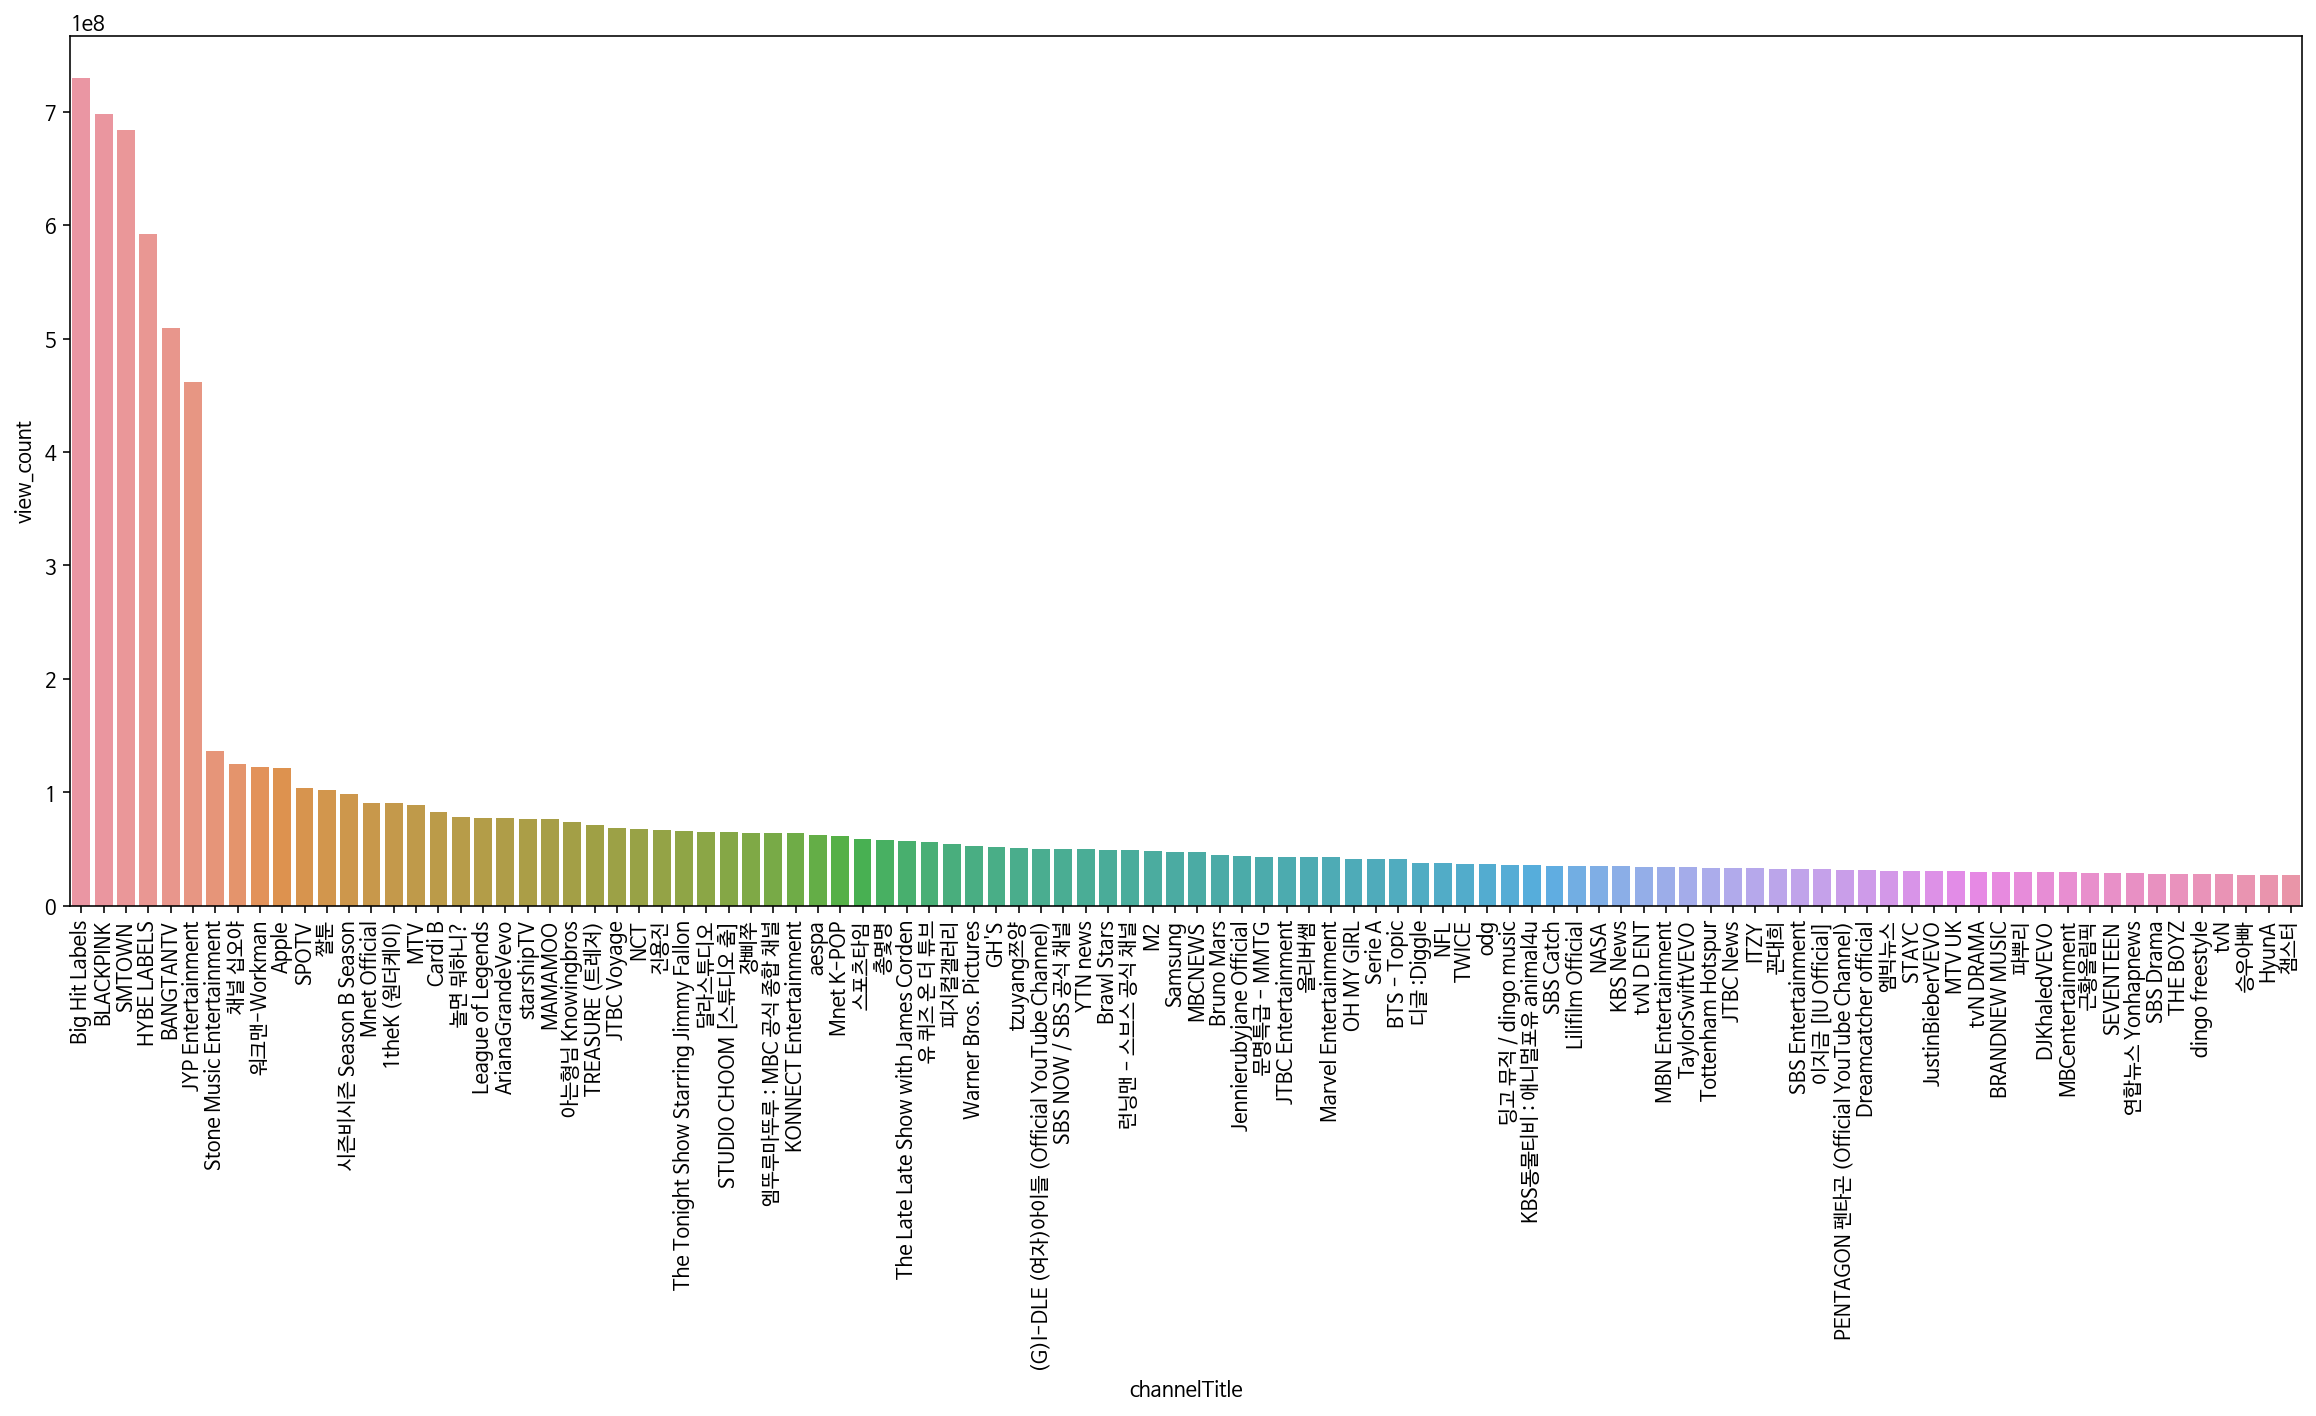

In [16]:
plt.figure(figsize=(20, 8))

sns.barplot(x='channelTitle', y="view_count", data=df_channel_view_top_100)

plt.xticks(rotation=90)
plt.show()

# 인기 영상 키워드 분석하기 - 제목 추출 및 정제

## 1. 데이터 조회

In [17]:
KRvideo

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58349,nkzSn3uvKcA,[국내 3대 미제사건] 이제는 2개의 사건이 남았다 #highlight #알쓸범잡 ...,2021-06-02T06:41:56Z,UC78PMQprrZTbU0IlMDsYZPw,tvN,24,2021-06-12T00:00:00Z,김상욱|박지선|알쓸범잡|알아두면쓸데있는범죄잡학사전|양정우PD|윤종신|장항준|정재민,1587800,7300,293,1584,https://i.ytimg.com/vi/nkzSn3uvKcA/default.jpg,False,False,#알쓸범잡 #알아두면 쓸데있는 범죄 잡학사전 #사건사고알쓸범잡 crimetrivia...
58350,ZzbNM2l-AAA,안녕 Hello,2021-05-31T09:01:25Z,UCTEWSEBfdU8GB7J_XV6VBKw,JOY - Topic,10,2021-06-12T00:00:00Z,JOY|안녕 Hello - Special Album|안녕 Hello,1584317,20515,713,6,https://i.ytimg.com/vi/ZzbNM2l-AAA/default.jpg,False,False,Provided to YouTube by SM Entertainment안녕 Hell...
58351,rhdgx6SfwvU,한국에 시집간 딸을 보러 온 외국 부모님이 문화충격 받은 이유,2021-06-01T10:30:15Z,UCudezj2i6R94QOPqGJhbZwg,에이 스토리 A STORY,24,2021-06-12T00:00:00Z,[None],986530,23004,285,565,https://i.ytimg.com/vi/rhdgx6SfwvU/default.jpg,False,False,외국 부모님이 한국과 사랑에 빠지게 된 이유? 오늘은 불의 나라 아제르바이잔에서 오...
58352,37x__fpGxGE,돼지갈비는 이렇게 먹어야지 제맛! [Charcoal Grilled Spar...,2021-06-02T23:31:48Z,UCuDLnJ_ZTQ9veA1mHnXEAJQ,먹두리,22,2021-06-12T00:00:00Z,돼지갈비|양념갈비|참숯갈비|Charcoal Grilled Spareribs|먹두리,471002,11417,257,1738,https://i.ytimg.com/vi/37x__fpGxGE/default.jpg,False,False,집 나간 입맛 돌아오게 만드는 채널 먹두리에서 여러분께 정말 맛있는 먹방 보여 드립...


## 2. 정렬 및 중복 제거

In [18]:
cols = ["title", "view_count"]
df = KRvideo[cols]

# 정렬 - 기준은 view_count 내림차순
df_sorted = df.sort_values(by="view_count", ascending=False)
df_sorted.head()

,title,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,296314174
54938,BTS (방탄소년단) 'Butter' Official MV,292502967
54729,BTS (방탄소년단) 'Butter' Official MV,289350312
54519,BTS (방탄소년단) 'Butter' Official MV,285698612
54284,BTS (방탄소년단) 'Butter' Official MV,282265069


In [19]:
# 제목 중복 제거 - 조회수가 가장 큰 값을 남겨 놓으면서 중복을 제거
df_sorted = df_sorted.drop_duplicates(['title'], keep='first')
df_sorted.head()

,title,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,296314174
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058
9696,BLACKPINK – ‘Lovesick Girls’ M/V,161416953


## 3. 제목 array로 조회하기

In [20]:
df_hot = df_sorted.copy()
df_hot['title'].values

array(["BTS (방탄소년단) 'Butter' Official MV",
       "BTS (방탄소년단) 'Dynamite' Official MV",
       "BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V", ...,
       "[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자9/25.../ YTN 라디오",
       'Earth Day 2021 Doodle',
       'Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020'], dtype=object)

## 4. 정규표현식(re)으로 한글 데이터만 남기기(한글, 띄어쓰기 포함)

In [21]:
import re # 정규식을 사용하기 위한 모듈
                                                                # [] : 괄호 안의 1개의 글자 / 가-힣 : 완성형 한글 전체 / \s : 모든 공백 / ^ : 아닌 것
                                                                # [^가-힣\s] : 완성형 한글 또는 공백이 아닌 한 글자.
df_hot['title_refined'] = df_hot['title'].apply(lambda x : re.sub("[^가-힣\s]", '', x))
df_hot

,title,view_count,title_refined
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,방탄소년단
9696,BLACKPINK – ‘Lovesick Girls’ M/V,161416953,
...,...,...,...
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),17294,싸꼰 사사건건 풀방송 라이브일차화
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),16957,싸꼰 사사건건 풀방송 라이브일차화
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",15845,정면국시보겠다면서 사과없는 의대생들 신장식 변호사 유지만 시사저널 기자 라디오
48130,Earth Day 2021 Doodle,0,


## 공백만 들어있지 않은 행을 조회
  - 공백만 있는 row를 삭제

In [22]:
df_hot = df_hot[ df_hot['title_refined'].apply(lambda x : re.sub('[^가-힣]', '', x)) != '' ]
df_hot

,title,view_count,title_refined
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,방탄소년단
53553,aespa 에스파 'Next Level' MV,84077957,에스파
52947,NCT DREAM 엔시티 드림 '맛 (Hot Sauce)' MV,81767273,엔시티 드림 맛
...,...,...,...
3014,[2020 K리그] 18R 울산 vs 서울 하이라이트,17814,리그 울산 서울 하이라이트
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),17294,싸꼰 사사건건 풀방송 라이브일차화
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),16957,싸꼰 사사건건 풀방송 라이브일차화
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",15845,정면국시보겠다면서 사과없는 의대생들 신장식 변호사 유지만 시사저널 기자 라디오


# 제목 단어 추출 및 빈도 수 구하기
* 인기 영상 키워드 분석하기

## 1. soynlp 설치
* 딥러닝 기반 한글 형태소 분류기

In [23]:
!pip install soynlp

     |████████████████████████████████| 419kB 7.4MB/s 


## 2. WordExtract로 단어 점수 학습
* 단어 점수 : 단어가 될 수 있는 수치
```python
  예시 1. 나는 사과를 먹는다. -> 단어 추출 -> ['나', '사과']
  예시 2. 아이오아이는 가수다. -> 단어 추출 -> ['아이오','아이', '가수'] ->['아이오아이', '가수'] 

  근데 '아이오아이'는 옛날부터 사용되어진 '단어'가 아니기 때문에, 단어 사전에는 없다!
  단어 사전에 없는 단어는 OOV ( Out Of Vocabulary )로 처리 된다. -> 없는 단어로 처리 됨

  soynlp는 연속되어지는 텍스트의 빈도(응집도 - cohesion), 경계점수( boundary entropy)를 이용해 신조어를 단어로 학습하는 능력이 있다.
```

In [54]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(
    min_frequency=10, # 최소 등장 빈도
    min_cohesion_forward=0.05, # 앞 쪽에 등장하는 단어의 최소 cohension 스코어
    min_right_branching_entropy=0.0 # 특정 단어 뒷쪽에 등장하는 단어들에 대한 혼잡도(Entropy)의 최소값
)

word_extractor.train(df_hot['title_refined'].values) # 문장을 통해서 단어들을 훈련 시켜주는 과정
words = word_extractor.extract() # 단어들을 확인하기 위해 사용
words

training was done. used memory 0.360 Gb
all cohesion probabilities was computed. # words = 2996
all branching entropies was computed # words = 15063
all accessor variety was computed # words = 15063


{'규': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0.3250829733914482, right_branching_entropy=2.410223160758827, left_accessor_variety=2, right_accessor_variety=12, leftside_frequency=0, rightside_frequency=52),
 '퀴': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=-0.0, right_branching_entropy=-0.0, left_accessor_variety=1, right_accessor_variety=1, leftside_frequency=13, rightside_frequency=0),
 '쏘': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0.6931471805599453, right_branching_entropy=0, left_accessor_variety=2, right_accessor_variety=0, leftside_frequency=17, rightside_frequency=0),
 '들': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.908055948762002, right_branching_entropy=4.21228593129897, left_accessor_variety=29, right_accessor_variety=96, leftside_frequency=110, rightside_frequency=413),
 '텐': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0.86850064

## 3. LTokenizer로 L-R 분리

In [55]:
sample_dict = {
    'a': 10,
    'b': 20
}

sample_dict.items()

dict_items([('a', 10), ('b', 20)])

In [57]:
from soynlp.tokenizer import LTokenizer

cohesion_score = { word : score.cohesion_forward for word, score in words.items() }

text = '방탄소년단'
for i in range(5):
    print(f'{text[:i+1]} : {cohesion_score[text[:i+1]]}')
# print("방 : {}".format(cohesion_score["방"]))
# print("방탄 : {}".format(cohesion_score["방탄"]))
# print("방탄소 : {}".format(cohesion_score["방탄소"]))
# print("방탄소년 : {}".format(cohesion_score["방탄소년"]))
# print("방탄소년단 : {}".format(cohesion_score["방탄소년단"]))

방 : 0
방탄 : 0.20746268656716418
방탄소 : 0.4336585079213105
방탄소년 : 0.5729260651117786
방탄소년단 : 0.6585275301164792


In [58]:
tokenizer = LTokenizer(scores=cohesion_score)

## 4. 제목 데이터를 입력해서 L만 남기기
- L만 남긴다는 이야기는 cohension_score가 높은 단어만 남기겠다.

In [59]:
df_hot['tokenize'] = df_hot['title_refined'].apply(lambda x : tokenizer.tokenize(x, remove_r=True))
df_hot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,view_count,title_refined,tokenize
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단,[방탄소년단]
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단,[방탄소년단]
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,방탄소년단,[방탄소년단]
53553,aespa 에스파 'Next Level' MV,84077957,에스파,[에스파]
52947,NCT DREAM 엔시티 드림 '맛 (Hot Sauce)' MV,81767273,엔시티 드림 맛,"[엔시티, 드림, 맛]"
...,...,...,...,...
3014,[2020 K리그] 18R 울산 vs 서울 하이라이트,17814,리그 울산 서울 하이라이트,"[리그, 울산, 서울, 하이라이트]"
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),17294,싸꼰 사사건건 풀방송 라이브일차화,"[싸꼰, 사사건건, 풀방송, 라이브]"
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),16957,싸꼰 사사건건 풀방송 라이브일차화,"[싸꼰, 사사건건, 풀방송, 라이브]"
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",15845,정면국시보겠다면서 사과없는 의대생들 신장식 변호사 유지만 시사저널 기자 라디오,"[정면국시보겠다면서, 사과없는, 의대생들, 신장식, 변호사, 유지만, 시사저널, 기..."


# 인기 영상 키워드 분석하기 - 단어 빈도 수 구하기

# 1. 인기 영상 추출(50만 조회수 이상)

In [29]:
df_hot_top = df_hot[df_sorted['view_count'] > 500000] 
df_hot_top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,view_count,title_refined,tokenize
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단,[방탄소년단]
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단,[방탄소년단]
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,방탄소년단,[방탄소년단]
53553,aespa 에스파 'Next Level' MV,84077957,에스파,[에스파]
52947,NCT DREAM 엔시티 드림 '맛 (Hot Sauce)' MV,81767273,엔시티 드림 맛,"[엔시티, 드림, 맛]"
...,...,...,...,...
4867,국방부 민원실에 ‘휴가 문의’ 전화 빗발 | 토요랭킹쇼,500196,국방부 민원실에 휴가 문의 전화 빗발 토요랭킹쇼,"[국방부, 민원실에, 휴가, 문의, 전화, 빗발, 토요]"
51952,[몰카]여자후배가 우리집에 배달을 온다면? 8탄 Ft. 이승윤,500125,몰카여자후배가 우리집에 배달을 온다면 탄 이승윤,"[몰카, 우리, 배달을, 온다면, 탄, 이승윤]"
21351,"1화) SBS 웃찾사 폐지후 신용등급 8,9등급 까지 떨어져 버린 웃찾사 개그맨의 ...",500110,화 웃찾사 폐지후 신용등급 등급 까지 떨어져 버린 웃찾사 개그맨의 삶 쓰리콤보 ...,"[화, 웃찾사, 폐지후, 신용등급, 등급, 까지, 떨어, 버린, 웃찾사, 개그맨, ..."
25553,혜리 Vlog | 갑자기 생긴 휴일🎶 혜리는 쉬는 날 뭘 할까? 아듀 2020!,500098,혜리 갑자기 생긴 휴일 혜리는 쉬는 날 뭘 할까 아듀,"[혜리, 갑자기, 생긴, 휴일, 혜리, 쉬는, 날, 뭘, 할까, 아듀]"


## 2. tokenized 단어 한 배열에 담기

In [30]:
# df_hot_top['tokenize'] 시리즈에 들어있는 내용들(단어들)을 리스트에 다 추가(sum)시키겠다.
words = sum(df_hot_top['tokenize'], [])
words

['방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '에스파',
 '엔시티',
 '드림',
 '맛',
 '방탄소년단',
 '마피아',
 '엔시티',
 '유',
 '방탄소년단',
 '에스파',
 '방탄소년단',
 '에버',
 '에버',
 '방탄소년단',
 '방탄소년단',
 '엑소',
 '방탄소년단',
 '여자아이들',
 '화',
 '방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '엔시티',
 '유',
 '강다니엘',
 '방탄소년단',
 '니쥬',
 '아이',
 '니쥬',
 '몬스타엑스',
 '샤이니',
 '세븐틴',
 '방탄소년단',
 '방탄소년단',
 '태민',
 '이데아',
 '아이즈원',
 '엔시티',
 '유',
 '넌',
 '날',
 '숨',
 '쉬게',
 '해',
 '강다니엘',
 '백현',
 '방탄소년단',
 '씨엘씨',
 '선미',
 '꼬리',
 '청하',
 '선공개',
 '리사의',
 '업그레이드된',
 '태국',
 '춤',
 '게',
 '춤',
 '무표정',
 '아는',
 '형님',
 '회',
 '오마이걸',
 '몬스타엑스',
 '아이',
 '방탄소년단',
 '카이',
 '음',
 '스테이',
 '마마무',
 '슈퍼',
 '호랑이',
 '투모로우바이투게더',
 '시',
 '분의',
 '하늘에서',
 '발견',
 '너와',
 '나',
 '방탄소년단',
 '여자친구',
 '펜타곤',
 '아스트로',
 '제시',
 '어떤',
 '방탄소년단',
 '에스파',
 '약속',
 '슈퍼',
 '방탄소년단',
 '엔시티',
 '유',
 '현아',
 '드림',
 '그',
 '뒤에서',
 '자신의',
 '음악',
 '세계',
 '만나다',
 '음',
 '태민',
 '더보이즈',
 '에이',
 '감아',
 '샤이니',
 '유아숲의',
 '아이',
 '엔시티',
 '드림',
 '무대',
 '투모로우바이투게더',
 '하이라이트',
 '불어온다',
 '비투비',
 '포유',
 '온앤오프',
 '슈퍼',
 '방탄소년단',
 '마마무',
 '딩가딩가',
 '이달의',

### counter 클래스로 words 빈도 파악하기

In [31]:
from collections import Counter

count = Counter(words)
words_dict = dict(count)

print(words_dict)

{'방탄소년단': 95, '에스파': 41, '엔시티': 15, '드림': 12, '맛': 22, '마피아': 30, '유': 15, '에버': 8, '엑소': 10, '여자아이들': 21, '화': 82, '강다니엘': 5, '니쥬': 2, '아이': 138, '몬스타엑스': 4, '샤이니': 17, '세븐틴': 9, '태민': 12, '이데아': 1, '아이즈원': 22, '넌': 3, '날': 17, '숨': 2, '쉬게': 1, '해': 8, '백현': 10, '씨엘씨': 1, '선미': 15, '꼬리': 36, '청하': 9, '선공개': 88, '리사의': 2, '업그레이드된': 2, '태국': 4, '춤': 6, '게': 17, '무표정': 2, '아는': 15, '형님': 17, '회': 126, '오마이걸': 10, '카이': 21, '음': 5, '스테이': 7, '마마무': 15, '슈퍼': 53, '호랑이': 5, '투모로우바이투게더': 10, '시': 13, '분의': 5, '하늘에서': 4, '발견': 17, '너와': 6, '나': 33, '여자친구': 23, '펜타곤': 2, '아스트로': 2, '제시': 15, '어떤': 16, '약속': 4, '현아': 18, '그': 43, '뒤에서': 1, '자신의': 1, '음악': 12, '세계': 36, '만나다': 16, '더보이즈': 10, '에이': 16, '감아': 1, '유아숲의': 2, '무대': 55, '하이라이트': 75, '불어온다': 3, '비투비': 3, '포유': 1, '온앤오프': 13, '딩가딩가': 9, '이달의': 2, '소녀': 11, '사랑': 47, '왜왜왜': 2, '프로': 39, '시간': 47, '극한': 15, '특수부대': 7, '훈련': 11, '경험한다': 1, '가짜사나이': 36, '모모랜드': 2, '박진영': 11, '보기만해도': 1, '힐링': 4, '가지': 47, '생크림케익': 1, '만들기': 43, '카네이션딸기초코레인

# 워드클라우드로 인기 영상들의 키워드 분석하기

### wordcloud 폰트 설정 및 생성

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # 폰트 지정
                      background_color='white', # 워드클라우드 배경색
                      width=500, height=500).generate_from_frequencies(words_dict) # generate_from_frequencies : 워드 클라우드생성 시에 필요한 단어 빈도 딕셔너리

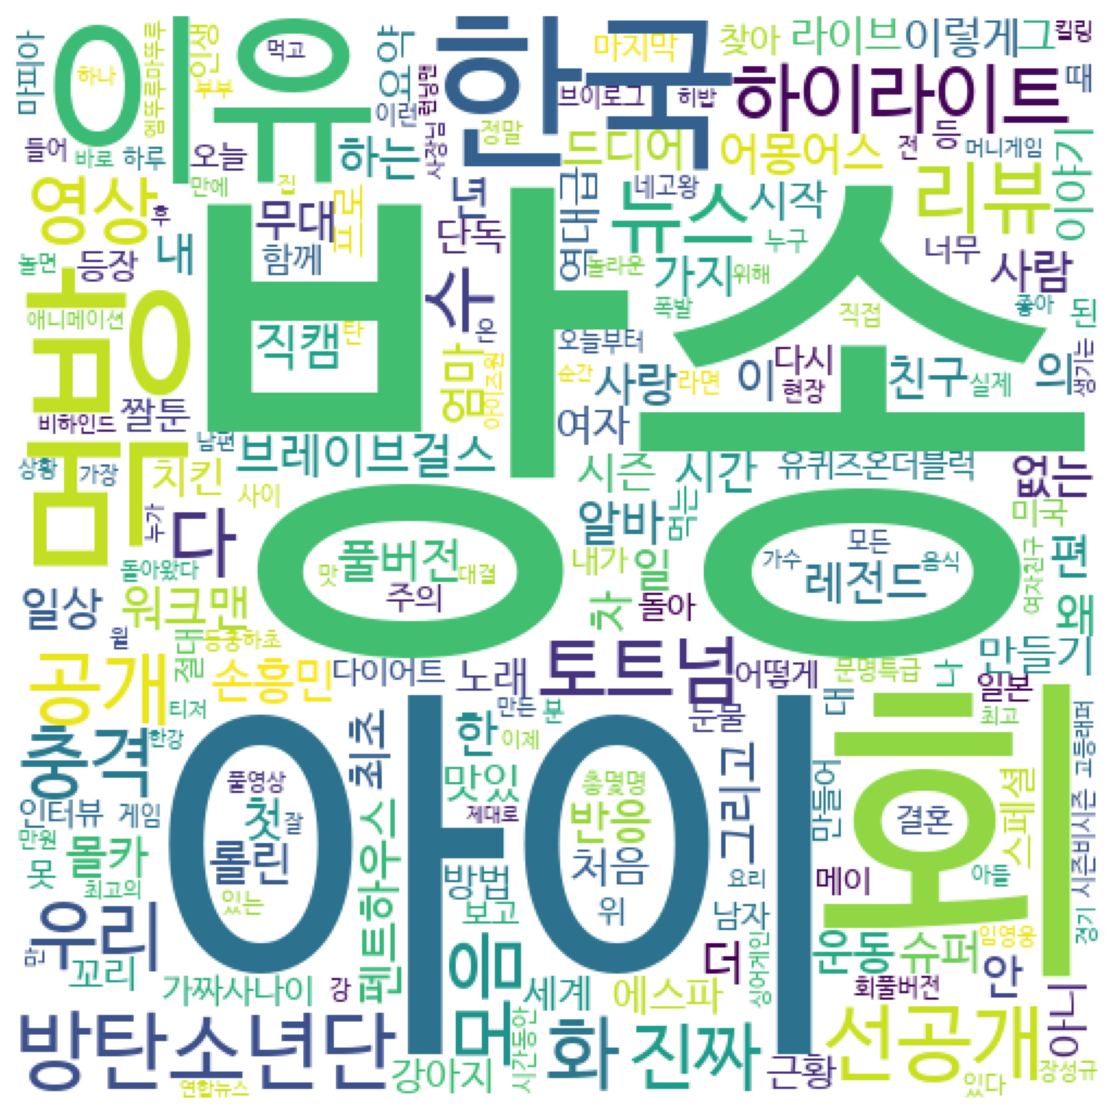

In [33]:
# 그리기
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 필요 없는 단어 제거

In [34]:
words_dict["아이"]

138

In [35]:
stopwords = { "된", "등", "만든", "잘", "안" }
for word in stopwords:
  words_dict.pop(word)

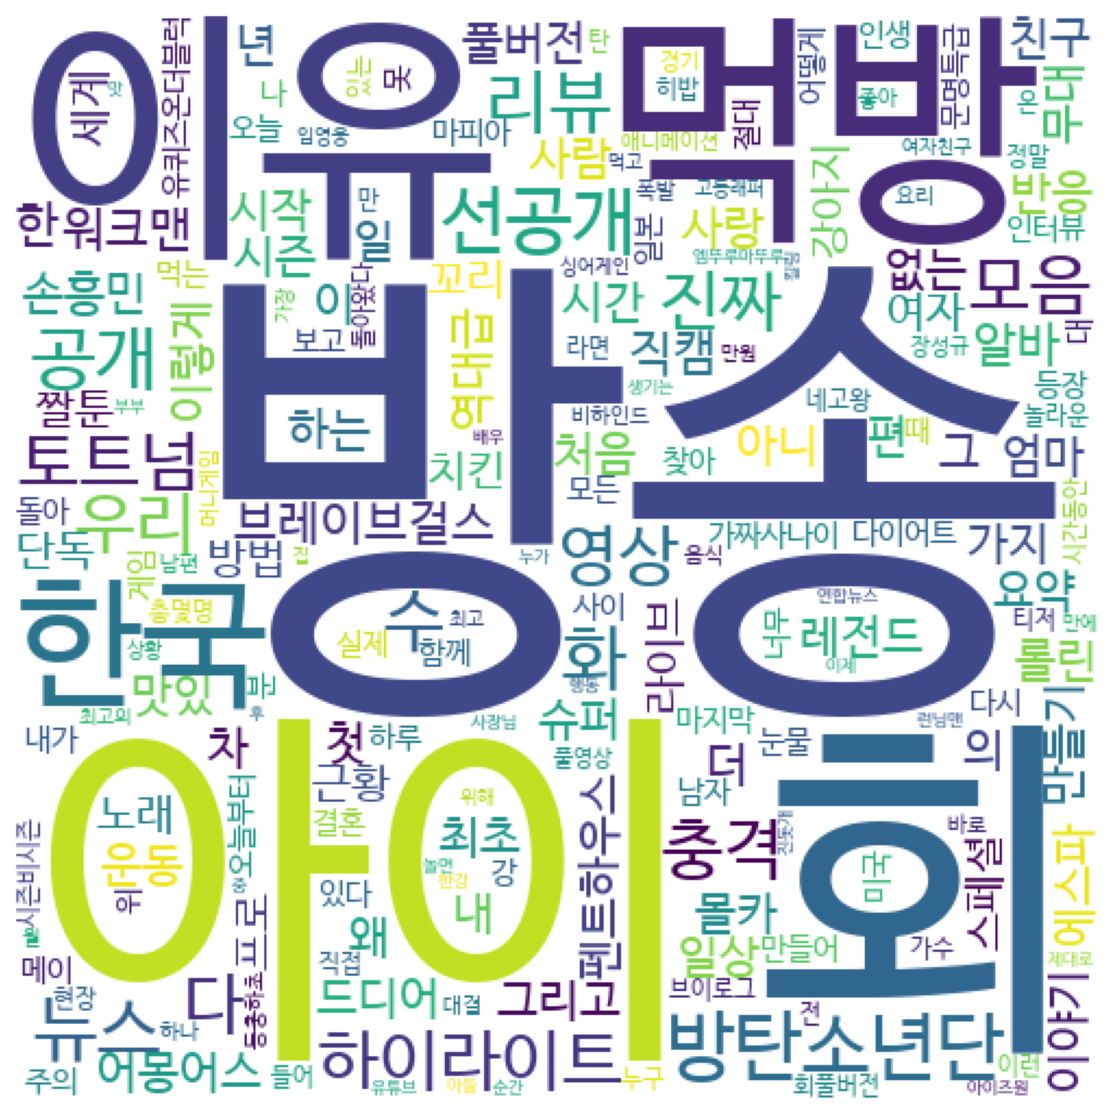

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # 폰트 지정
                      background_color='white', # 워드클라우드 배경색
                      width=500, height=500).generate_from_frequencies(words_dict) # generate_from_frequencies : 워드 클라우드생성 시에 필요한 단어 빈도 딕셔너리
# 그리기
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()